Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5145 - accuracy: 0.8206
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3924 - accuracy: 0.8593
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3542 - accuracy: 0.8717
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3331 - accuracy: 0.8782
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3138 - accuracy: 0.8857
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3020 - accuracy: 0.8895
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2910 - accuracy: 0.8936
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2826 - accuracy: 0.8960
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2724 - accuracy: 0.8989
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.263

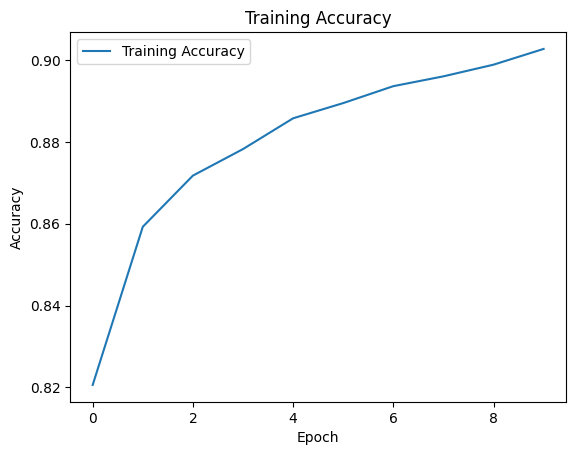

In [34]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 加载数据集
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 数据预处理
train_images = train_images / 255.0
test_images = test_images / 255.0

# 定义模型
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

optimizer = keras.optimizers.SGD(lr=0.001,momentum=0.9,nesterov=True)
# 编译模型
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 训练模型
epochs = 10
history = model.fit(train_images, train_labels, epochs=epochs)

# 评估模型
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 可视化训练过程
plt.plot(range(epochs), history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [32]:
# 保存整个模型
model.save('my_model_A.h5')

In [25]:
import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
# 加载Fashion MNIST数据集
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# 将数据随机划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# 将训练集进一步划分为训练集和验证集
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [26]:
model_A=keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1,activation="sigmoid"))

In [27]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [28]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",optimizer="sgd",
                     metrics=["accuracy"])

In [29]:
history = model_B_on_A.fit(X_train,y_train,epochs=4,
                           validation_data=(X_valid,y_valid))

Epoch 1/4
1200/1200 [==============================] - 4s 3ms/step - loss: -585015488.0000 - accuracy: 0.1003 - val_loss: -1191111040.0000 - val_accuracy: 0.0969
Epoch 2/4
1200/1200 [==============================] - 4s 3ms/step - loss: -1755751936.0000 - accuracy: 0.1003 - val_loss: -2382027264.0000 - val_accuracy: 0.0969
Epoch 3/4
1200/1200 [==============================] - 3s 2ms/step - loss: -2926487552.0000 - accuracy: 0.1003 - val_loss: -3572947200.0000 - val_accuracy: 0.0969
Epoch 4/4
1200/1200 [==============================] - 3s 3ms/step - loss: -4097228032.0000 - accuracy: 0.1003 - val_loss: -4763864064.0000 - val_accuracy: 0.0969


先训练几个轮次然后解冻重用的层（这需要再次编译模型），并继续进行训练来微调任务B的重用层。解冻重用层以后，降低学习率通常是个好主意。

In [30]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable=True

optimizer = keras.optimizers.SGD(lr=1e-4)
model_B_on_A.compile(loss="binary_crossentropy",optimizer=optimizer,
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train,y_train,epochs=16,
                           validation_data=(X_valid,y_valid))

Epoch 1/16
1200/1200 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.1005 - val_loss: nan - val_accuracy: 0.0994
Epoch 2/16
1200/1200 [==============================] - 5s 5ms/step - loss: nan - accuracy: 0.1001 - val_loss: nan - val_accuracy: 0.0994
Epoch 3/16
1200/1200 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.1001 - val_loss: nan - val_accuracy: 0.0994
Epoch 4/16
1200/1200 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.1001 - val_loss: nan - val_accuracy: 0.0994
Epoch 5/16
1200/1200 [==============================] - 5s 4ms/step - loss: nan - accuracy: 0.1001 - val_loss: nan - val_accuracy: 0.0994
Epoch 6/16
1200/1200 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.1001 - val_loss: nan - val_accuracy: 0.0994
Epoch 7/16
1200/1200 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.1001 - val_loss: nan - val_accuracy: 0.0994
Epoch 8/16
1200/1200 [============

In [31]:
model_B_on_A.evaluate(X_test,y_test)

375/375 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.1002


[nan, 0.10016666352748871]